In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def calcular_stokes (I90, I45, I135, I0):
  S0 = I0.astype(np.int16)+I90.astype(np.int16)
  S1 = I0.astype(np.int16)-I90.astype(np.int16)
  S2 = I45.astype(np.int16)-I135.astype(np.int16)
  return S0, S1, S2

def calcular_dolp(S0,S1,S2):
  dolp = np.divide(np.sqrt(np.power(S1.astype(float),2) + np.power(S2.astype(float),2)),S0, out = np.zeros_like(S0.astype(float)), where = S0!= 0)
  return dolp

def calcular_aolp(S1,S2):
  aolp = 1/2*np.arctan2(S2.astype(float),S1.astype(float))
  return np.degrees(aolp)

In [3]:
# Elegimos la muestra
# ["containers", "fruit", "plant", "monitors", "mirrorcard", "door", "dinosaur", "bottles", "tejido_denso", "cebolla", "papel_optico", "pino_leaf", "bee_mouth", "kettle", "cellphonecases", "plate", "screen"]
sample = "screen"

In [4]:
#Cargamos las intensidades polarizadas en RGB
I0 = cv2.cvtColor(cv2.imread('../../dataset/'+sample+'/I0.png'), cv2.COLOR_BGR2RGB)
I45 = cv2.cvtColor(cv2.imread('../../dataset/'+sample+'/I45.png'), cv2.COLOR_BGR2RGB)
I90 = cv2.cvtColor(cv2.imread('../../dataset/'+sample+'/I90.png'), cv2.COLOR_BGR2RGB)
I135 = cv2.cvtColor(cv2.imread('../../dataset/'+sample+'/I135.png'), cv2.COLOR_BGR2RGB)

# Calculamos los parámetros de Stokes, DoLP y AoLP
S0, S1, S2 = calcular_stokes(I90, I45, I135, I0)
DoLP = calcular_dolp(S0,S1,S2)
AoLP = calcular_aolp(S1,S2)

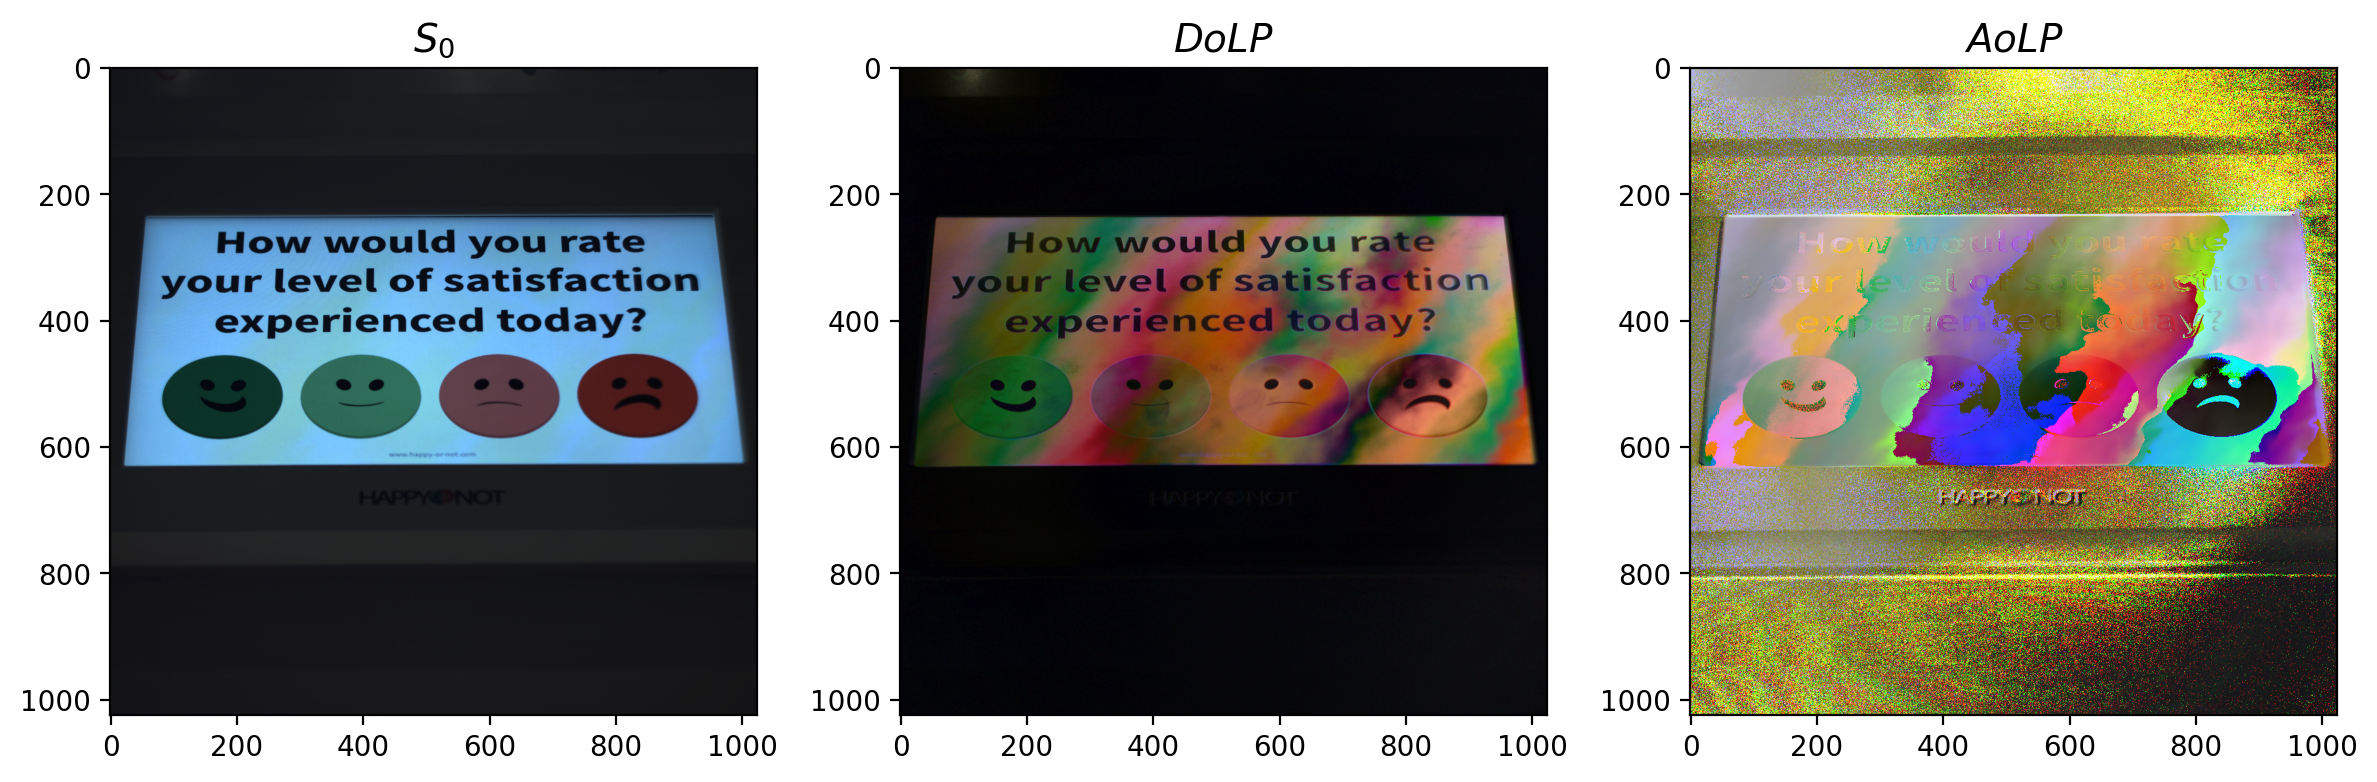

In [5]:
# Figura
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=200)

# Intensidad Total
S0_norm = cv2.normalize(S0, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
axes[0].imshow(S0_norm)
axes[0].set_title(r'$S_0$', fontsize=14)

# DoLP
DoLP_norm = cv2.normalize(DoLP, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
im0 = axes[1].imshow(DoLP_norm)
axes[1].set_title(r'$DoLP$', fontsize=14)

# AoLP
AoLP_norm = cv2.normalize(AoLP, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
im1 = axes[2].imshow(AoLP_norm)
axes[2].set_title(r'$AoLP$', fontsize=14)

plt.tight_layout()
plt.show()